In [1]:
import torch
import numpy as np
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from ptsne.ptsne import ParametricTSNE
from matplotlib import pyplot as plt

In [2]:
mnist = MNIST(
    './data',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

In [3]:
testdata = mnist.data.reshape(-1, 28*28) / 255.

Notes from testing:

- `hidden_layer_dims = [300,100]` works well
- learned `alpha` for perplexity of 100 is about 1.8
- learned `alpha` for perplexity of 50 is > 2

In [16]:
foo = ParametricTSNE(28*28, 2, 50, use_cuda=False, hidden_layer_dims=[300,100], alpha=2, seed=42) # use_cuda=True, alpha=1

In [17]:
foo.fit(testdata[:5000], batch_size=1000, epochs=30, learning_rate=0.01, pretrain=True, verbose=True, loss_func='kl')

Calculating PCA
2020-10-05 15:27:07.687944: Beginning pretraining for 5 epochs
2020-10-05 15:27:08.089231: Loss after epoch 0: 38.59666895866394
2020-10-05 15:27:08.438477: Loss after epoch 1: 17.936113357543945
2020-10-05 15:27:08.752700: Loss after epoch 2: 8.522974848747253
2020-10-05 15:27:09.065922: Loss after epoch 3: 4.0917885303497314
2020-10-05 15:27:09.430181: Loss after epoch 4: 2.184025079011917
2020-10-05 15:27:09.431183: Finished pretraining
Indexing
2020-10-05 15:27:20.003024: Beginning training for 30 epochs
2020-10-05 15:27:22.720958: Loss after epoch 1: 14.6167912428614
2020-10-05 15:27:25.206719: Loss after epoch 2: 13.499514891764807
2020-10-05 15:27:27.790553: Loss after epoch 3: 12.76228989337296
2020-10-05 15:27:30.124211: Loss after epoch 4: 12.282553807569265
2020-10-05 15:27:32.358810: Loss after epoch 5: 11.92641295473408
2020-10-05 15:27:34.654424: Loss after epoch 6: 11.461348082890076
2020-10-05 15:27:36.894030: Loss after epoch 7: 11.104974502505538
2020-

In [18]:
p_precalc = foo.p_ij

In [19]:
# bar = foo(testdata[:20000].cuda()).cpu().detach().numpy()
bar = foo(testdata[:20000]).cpu().detach().numpy()

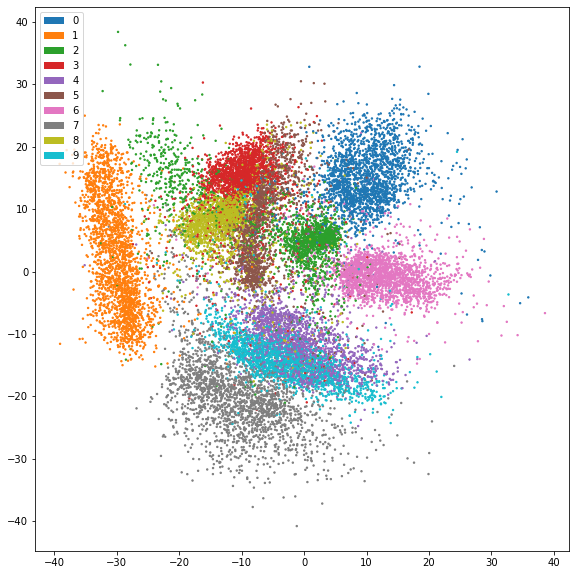

In [20]:
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
colors = [plt.cm.tab10.colors[i] for i in mnist.targets[:20000]]
ax.scatter(bar[:,0],bar[:,1],c=colors, s=2)
ax.set_aspect(1)
recs = []
for i in range(0,10):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=plt.cm.tab10.colors[i]))
ax.legend(recs,list(range(10)),loc=2)